Height as tempurature increases


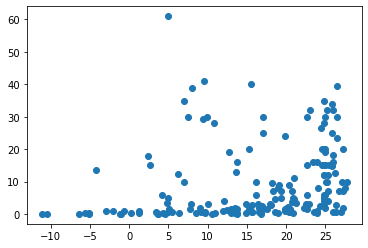

Height as rain increases


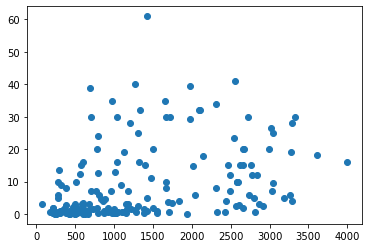

Height as altitude increases


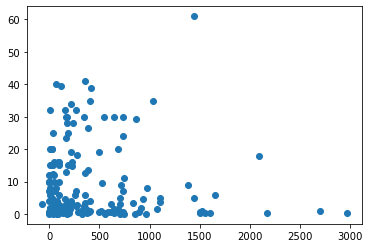

Height for each site


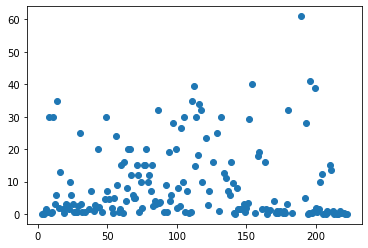

 line of best fit is 0.2798363725420033 * 16.125280898876408 + 4.396549174633079
 line of best fit is 0.004435779728580934 * 1344.1404494382023 + 2.9466783296118626
 line of best fit is -0.0010052461241302833 * 393.58988764044943 + 9.304643996642943
 line of best fit is 0.000781450468754515 * 107.91011235955057 + 8.824662879708784
Tempurature R Squared: 0.9696969696969697
Rain R Squared: 0.6484848484848484
Altitude R Squared:-0.4484848484848485
Site R Squared:0.17575757575757578
The factor with the best explaining power for height is tempurature with an explaining power of 0.9696969696969697


In [3]:
#imports pandas to make use of a dataframe
import pandas
#imports pyplot as plt for graphing
import matplotlib.pyplot as plt
#imports the excel file as a dataframe
file = pandas.read_excel('PlantHeightData.xlsx')
#creates scatter plots of the four required categories
print("Height as tempurature increases")
plt.scatter(file.temp, file.height, marker='o')
plt.show()
print("Height as rain increases")
plt.scatter(file.rain, file.height, marker='o')
plt.show()
print("Height as altitude increases")
plt.scatter(file.alt, file.height, marker='o')
plt.show()
print("Height for each site")
plt.scatter(file.site, file.height, marker='o')
plt.show()
#calculates the mean of y for later use
yAverage = file.height.mean()
#calculates SE of y's mean for later use
SEyAverage = 0
for i in range(0, len(file.height)):
    SEyAverage += file.height[i] - yAverage

#This method can calculate the R Squared using height as the Y axis and the parameter as the X axis
def calcRSquared(xColumn):
    #calculates the mean of the x Axis
    xAverage = xColumn.mean()
    #calculates the top of the m function
    #mTop = file.apply( lambda x: row ((row[xColumn] - xAverage )* (row[file.height] - yAverage),axis =1 ).sum())
    mTop = 0
    for i in range(0, len(xColumn)):
        mTop += (xColumn[i] - xAverage) * (file.height[i] - yAverage)
    #calculates the bottom of the m function
    mBottom = 0
    for i in range(0, len(xColumn)):
        mBottom+= pow((xColumn[i] - xAverage), 2)
    #calculates m
    m = mTop / mBottom
    #calculates b
    b = yAverage - m * xAverage
    print(" line of best fit is " + str(m) + " * " + str(xAverage) + " + " + str(b))
    #calculates SE of the line of best fit
    SEline = 0
    for i in range(0, len(file.height)):
        SEline += file.height[i] - (m * xColumn[i] + b)
    #calculates and returns R Squared
    rSquared = 1 - (SEline / SEyAverage)
    return rSquared

#Calculates R Squared for all four of the relevant x axes
tempuratureRSquared = calcRSquared(file.temp)
rainRSquared = calcRSquared(file.rain)
altitudeRSquared = calcRSquared(file.alt)
siteRSquared = calcRSquared(file.site)

#Prints the R Squared value for the relevant x axes
print("Tempurature R Squared: " + str(tempuratureRSquared))
print("Rain R Squared: " + str(rainRSquared))
print("Altitude R Squared:" + str(altitudeRSquared))
print("Site R Squared:" + str(siteRSquared))

#Creates a list of tuples, with each tuple consisting of the title of the axis as well as its R Squared value.
rSquaredTuples = []
rSquaredTuples.append(("tempurature", tempuratureRSquared))
rSquaredTuples.append(("rain", rainRSquared))
rSquaredTuples.append(("altitude", altitudeRSquared))
rSquaredTuples.append(("site", siteRSquared))

#Creates a base value tuple that should be replaced when the tuples are compared to each other
bestRIndex = ("Error", -1000000)
#Finds the highest explaining power by comparing the R Value of each tuple against each other and recording the best one
for i in range(0, len(rSquaredTuples)):
    if(rSquaredTuples[i][1] > bestRIndex[1]):
        bestRIndex = rSquaredTuples[i]
print("The factor with the best explaining power for height is " + str(bestRIndex[0]) + " with an explaining power of " + str(bestRIndex[1]))